In [2]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')

%matplotlib inline

import seaborn as sns

### data load
- 한글 깨짐 해결 위해 인코딩 'CP949'로 지정 

In [3]:
df = pd.read_csv('shinhancard.csv', sep = ',', encoding = 'CP949')

In [4]:
df.head()

,회사이름,회사코드,리뷰코드,직종구분,재직상태,근무지역,등록일자,별점평가,승진기회,복지급여,워라밸,사내문화,경영진,기업장점,기업단점,바라는점,성장예상,추천여부
0,신한카드(주),23957,1030925,금융/재무,전직원,서울,2019/3/20,60,40,100,60,60,40,하는 업무에 비해 급여를 많이 받는다는 느낌이 든다.,관리자들이 별로다. 눈앞의 이익만 생각하고 개개인의 개인 플레이가 심하다.,기업의 미래를 생각했으면 한다 어떤 점이 회사애 도움이 될지를 생각했으면...,비슷,이 기업을 추천 합니다!
1,신한카드(주),23957,1026593,금융/재무,현직원,서울,2019/3/17,60,60,100,100,20,20,돈을 많이줌. 삼전 무선반도체 제외하고 국내 사기업 톱이라생각,"업무문화가 정말 이상함. 허례허식, 쓸때없는거를 중시하고 전문가를 천대함.",은행에서 낙하산 내려보내지말고 정말 카드업을 아는사람으로 배치하라,NaN,이 기업을 추천하지 않습니다.
2,신한카드(주),23957,1023953,서비스/고객지원,전직원,대전,2019/3/14,40,60,40,40,40,40,"오래 재직한다면, 본인이 업무에 대해 배우고자 하는 열정이 있다면, 교육적인 부분에...","복지 제도의 부족, 출퇴근 시간이 전혀 지켜지지 않음(출근은 일찍, 퇴근은 늦게) ...",직원들의 불만을 듣고 개선하기 위해 노력하는 척이라도 보여줬으면 좋겠음.\r회사 공...,비슷,이 기업을 추천하지 않습니다.
3,신한카드(주),23957,1016246,생산/제조,전직원,서울,2019/3/9,60,60,60,60,60,60,복지카드 생일 기프트카드 옆에 보라매 공원이 잇어서 쉬기 좋다,"단순업무 기계소리때문에 머리가 조금 아프다. 단순단순 하다., 미래가 없다. 외왜워...",시스템적으로 완벽 정규직채용을 바란다. 정규직이 아니면 미래가 없다,비슷,이 기업을 추천 합니다!
4,신한카드(주),23957,1010197,금융/재무,전직원,서울,2019/3/5,40,40,60,40,60,40,"성과제이기에 본인이 일한 만큼 받을 수 있음, 복리후생이 나쁘지는 않은편임","칼퇴불가, 성과강요가 있으며 성과가 눈에 보이지 않을경우 눈치가 보인다",직원들의 의견을 들어주셨으면 좋겠습니다.,비슷,이 기업을 추천하지 않습니다.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 18 columns):
회사이름    143 non-null object
회사코드    143 non-null int64
리뷰코드    143 non-null int64
직종구분    143 non-null object
재직상태    143 non-null object
근무지역    143 non-null object
등록일자    143 non-null object
별점평가    143 non-null int64
승진기회    143 non-null int64
복지급여    143 non-null int64
워라밸     143 non-null int64
사내문화    143 non-null int64
경영진     143 non-null int64
기업장점    143 non-null object
기업단점    143 non-null object
바라는점    142 non-null object
성장예상    126 non-null object
추천여부    143 non-null object
dtypes: int64(8), object(10)
memory usage: 20.2+ KB


In [6]:
# null check
df.isnull().sum()

회사이름     0
회사코드     0
리뷰코드     0
직종구분     0
재직상태     0
근무지역     0
등록일자     0
별점평가     0
승진기회     0
복지급여     0
워라밸      0
사내문화     0
경영진      0
기업장점     0
기업단점     0
바라는점     1
성장예상    17
추천여부     0
dtype: int64

### numeric feature (별점정보) 활용 분석  

In [7]:
df_sub = df[['별점평가', '승진기회', '복지급여', '워라밸', '사내문화', '경영진']]

In [8]:
df_sub.head()

,별점평가,승진기회,복지급여,워라밸,사내문화,경영진
0,60,40,100,60,60,40
1,60,60,100,100,20,20
2,40,60,40,40,40,40
3,60,60,60,60,60,60
4,40,40,60,40,60,40


#### correlation check

In [9]:
corr = df_sub.corr()
corr

,별점평가,승진기회,복지급여,워라밸,사내문화,경영진
별점평가,1.000000,0.536313,0.611900,0.625217,0.628027,0.579671
승진기회,0.536313,1.000000,0.408182,0.355623,0.351435,0.475225
복지급여,0.611900,0.408182,1.000000,0.489365,0.405769,0.421416
워라밸,0.625217,0.355623,0.489365,1.000000,0.565596,0.482003
사내문화,0.628027,0.351435,0.405769,0.565596,1.000000,0.702010
경영진,0.579671,0.475225,0.421416,0.482003,0.702010,1.000000


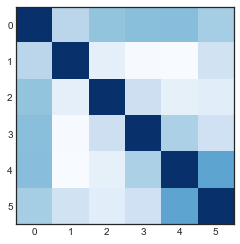

In [49]:
plt.imshow(corr, cmap='Blues')
plt.show()

별점평가 - 복지급여/워라밸/사내문화 상관관계 있는 것으로 나타남 <br>
사내문화 - 경영진 상관관계 높아 향후 regression 수행 시 고려 필요 

#### data distribution check

In [10]:
df_sub.describe()

,별점평가,승진기회,복지급여,워라밸,사내문화,경영진
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,62.517483,53.286713,71.608392,57.202797,56.223776,50.629371
std,18.819698,21.222371,21.416406,19.515454,22.259804,20.252518
min,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
25%,60.000000,40.000000,60.000000,40.000000,40.000000,40.000000
50%,60.000000,60.000000,80.000000,60.000000,60.000000,60.000000
75%,80.000000,60.000000,80.000000,60.000000,80.000000,60.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


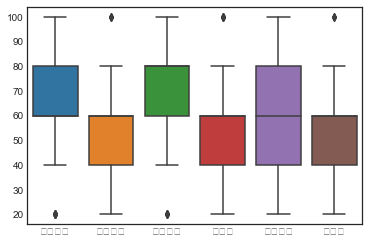

In [11]:
sns.boxplot(data = df_sub)

승진기회/워라밸/경영진 상대적으로 낮은 점수대에 분포 & 평균 낮게 나타남 <br>
복지급여 점수 높음 <br>
사내문화 점수 편차 큼 <br>

### linear regression

#### train/test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = df_sub.iloc[:,1:]
y = df_sub.iloc[:,0]

In [14]:
x.head()

,승진기회,복지급여,워라밸,사내문화,경영진
0,40,100,60,60,40
1,60,100,100,20,20
2,60,40,40,40,40
3,60,60,60,60,60
4,40,60,40,60,40


In [15]:
y.head()

0    60
1    60
2    40
3    60
4    40
Name: 별점평가, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7, test_size = 0.3)

#### fitting

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lr.coef_

array([0.17311566, 0.28955039, 0.21062948, 0.17710548, 0.02690472])

In [23]:
lr.score(x_test, y_test)

0.5635119587291584

In [24]:
y_pred_lr = lr.predict(x_test)

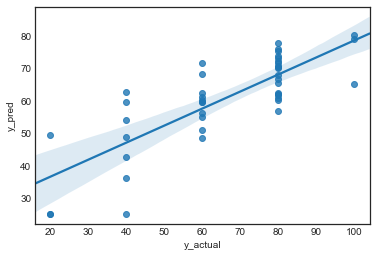

In [33]:
x, y = pd.Series(y_test, name="y_actual"), pd.Series(y_pred_lr, name="y_pred")
sns.regplot(x=x, y=y)

### random forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rf = RandomForestRegressor(n_estimators = 100, max_features = None, oob_score = True
                           , min_samples_split = 10, random_state = 7)

In [37]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=7, verbose=0, warm_start=False)

In [38]:
rf.feature_importances_

array([0.11549778, 0.25345023, 0.34846494, 0.1477859 , 0.13480114])

In [39]:
rf.score(x_test, y_test)

0.5292805971513551

In [40]:
y_pred_rf = rf.predict(x_test)

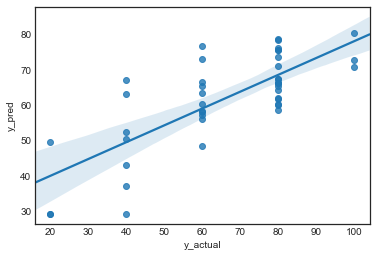

In [43]:
x, y = pd.Series(y_test, name="y_actual"), pd.Series(y_pred_rf, name="y_pred")
sns.regplot(x=x, y=y)